In [1]:
# Importing necessary libraries
import pandas as pd

# File path
file_path = 'D://TAAUG2338//archive - 2023-08-06T220647.832//IMDB Dataset.csv'

# Reading the IMDB reviews dataset
imdb_data = pd.read_csv(file_path)

# Displaying the first few rows
imdb_data.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#### The IMDB reviews dataset consists of two columns:

#### Review: This column contains the text of the movie reviews.
#### Sentiment: This column contains the sentiment label associated with each review, either "positive" or "negative."
#### The dataset provides a rich source of real-life movie reviews, which we can use to train a sentiment analysis model.

In [2]:
# Summary statistics of the dataset
summary_info = {
    "Total Reviews": imdb_data.shape[0],
    "Positive Reviews": imdb_data[imdb_data['sentiment'] == 'positive'].shape[0],
    "Negative Reviews": imdb_data[imdb_data['sentiment'] == 'negative'].shape[0],
    "Missing Reviews": imdb_data['review'].isnull().sum(),
    "Missing Sentiments": imdb_data['sentiment'].isnull().sum()
}

summary_info


{'Total Reviews': 50000,
 'Positive Reviews': 25000,
 'Negative Reviews': 25000,
 'Missing Reviews': 0,
 'Missing Sentiments': 0}

# What are the most common words in positive and negative reviews?

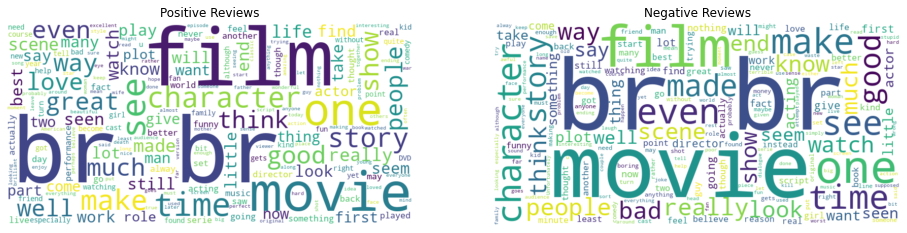

In [3]:
# Importing necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separating positive and negative reviews
positive_reviews = ' '.join(imdb_data[imdb_data['sentiment'] == 'positive']['review'])
negative_reviews = ' '.join(imdb_data[imdb_data['sentiment'] == 'negative']['review'])

# Generating word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Plotting word clouds for positive and negative reviews
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Reviews")

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Reviews")

plt.show()


# How do review lengths differ between positive and negative sentiments?

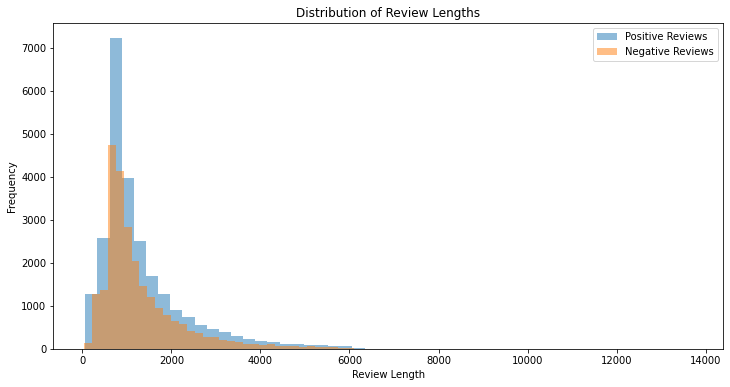

In [4]:
# Calculating review lengths for positive and negative reviews
imdb_data['review_length'] = imdb_data['review'].apply(len)
positive_lengths = imdb_data[imdb_data['sentiment'] == 'positive']['review_length']
negative_lengths = imdb_data[imdb_data['sentiment'] == 'negative']['review_length']

# Plotting histograms for review lengths
plt.figure(figsize=(12, 6))
plt.hist(positive_lengths, bins=50, alpha=0.5, label='Positive Reviews')
plt.hist(negative_lengths, bins=50, alpha=0.5, label='Negative Reviews')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.legend(loc='upper right')
plt.show()


# How does the distribution of review lengths differ between positive and negative reviews?

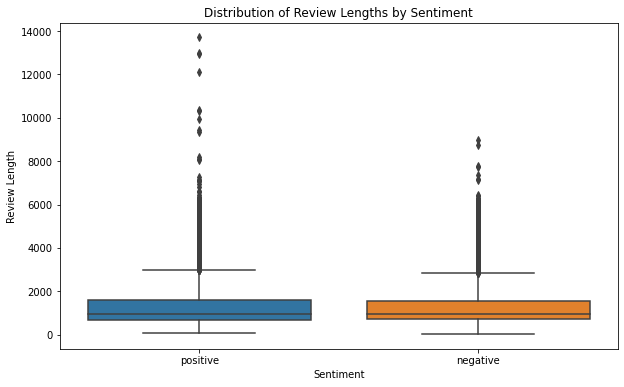

In [11]:
import seaborn as sns

# Creating a box plot to compare review lengths between positive and negative reviews
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='review_length', data=imdb_data)
plt.title('Distribution of Review Lengths by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()


# What are the most common bigrams (two-word combinations) in positive and negative reviews?

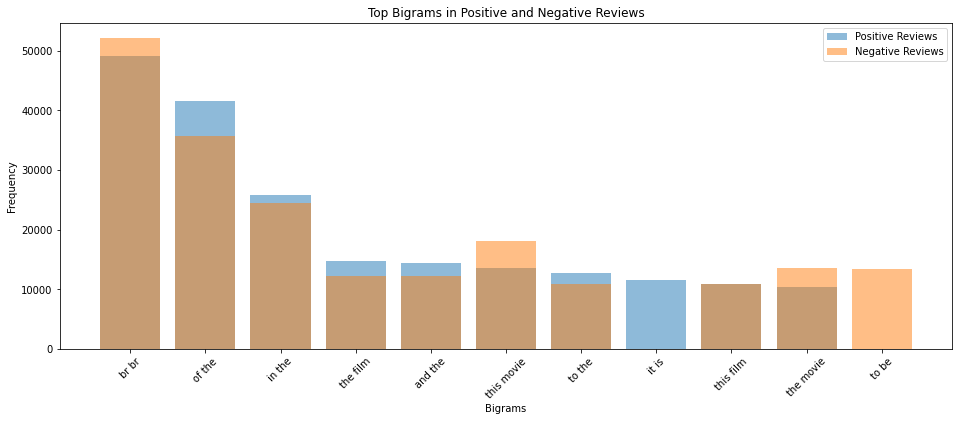

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Function to get top bigrams
def get_top_bigrams(corpus, n=10):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Getting top bigrams for positive and negative reviews
positive_bigrams = get_top_bigrams(imdb_data[imdb_data['sentiment'] == 'positive']['review'])
negative_bigrams = get_top_bigrams(imdb_data[imdb_data['sentiment'] == 'negative']['review'])

# Plotting top bigrams
plt.figure(figsize=(16, 6))
plt.bar(*zip(*positive_bigrams), alpha=0.5, label='Positive Reviews')
plt.bar(*zip(*negative_bigrams), alpha=0.5, label='Negative Reviews')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top Bigrams in Positive and Negative Reviews')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()


# Data Cleaning

In [5]:
from sklearn.preprocessing import LabelEncoder
from bs4 import BeautifulSoup
import re

# Function to clean a review
def clean_review(review):
    # Removing HTML tags
    review = BeautifulSoup(review, "html.parser").get_text()
    # Removing non-alphabetic characters
    review = re.sub('[^a-zA-Z\s]', '', review)
    # Converting to lowercase
    review = review.lower()
    return review

# Applying the cleaning function to all reviews
imdb_data['cleaned_review'] = imdb_data['review'].apply(clean_review)

# Encoding sentiment labels
label_encoder = LabelEncoder()
imdb_data['sentiment_label'] = label_encoder.fit_transform(imdb_data['sentiment'])

# Displaying the first few cleaned reviews
imdb_data[['cleaned_review', 'sentiment_label']].head()


C:\Users\Deep.ai\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


,cleaned_review,sentiment_label
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1


# Modeling
## Text Vectorization: Converting the cleaned reviews into numerical form.
## Model Building: Creating a model using a suitable algorithm.
## Model Training: Training the model on a training dataset.
## Model Evaluation: Evaluating the model on a validation dataset.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    imdb_data['cleaned_review'], imdb_data['sentiment_label'], test_size=0.2, random_state=42)

# Vectorizing the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

# Building and training a logistic regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)

# Predicting on the validation set
y_val_pred = lr_model.predict(X_val_tfidf)

# Calculating accuracy
accuracy = accuracy_score(y_val, y_val_pred)
accuracy


0.8935

In [7]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Defining the models
models = {
    "Logistic Regression": lr_model,
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Multinomial Naive Bayes": MultinomialNB()
}

# Training the models and printing classification reports
classification_reports = {}
for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_val_pred = model.predict(X_val_tfidf)
    report = classification_report(y_val, y_val_pred)
    classification_reports[model_name] = report
    print(f"Classification Report for {model_name}:\n{report}\n{'='*50}\n")


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4961
           1       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      4961
           1       0.79      0.86      0.82      5039

    accuracy                           0.81    

# Tuning the best two models 

In [8]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for Logistic Regression
lr_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Create a GridSearchCV object for Logistic Regression
lr_grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), lr_params, cv=5, n_jobs=-1)

# Fit the grid search to the data
lr_grid_search.fit(X_train_tfidf, y_train)

# Print the best hyperparameters
print("Best Hyperparameters for Logistic Regression:", lr_grid_search.best_params_)

# Predict using the best model
y_val_pred_lr = lr_grid_search.predict(X_val_tfidf)

# Print the classification report
print("Classification Report for Tuned Logistic Regression:\n", classification_report(y_val, y_val_pred_lr))


Best Hyperparameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report for Tuned Logistic Regression:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [9]:
# Define hyperparameters for Multinomial Naive Bayes
mnb_params = {
    'alpha': [0.1, 0.5, 1],
}

# Create a GridSearchCV object for Multinomial Naive Bayes
mnb_grid_search = GridSearchCV(MultinomialNB(), mnb_params, cv=5, n_jobs=-1)

# Fit the grid search to the data
mnb_grid_search.fit(X_train_tfidf, y_train)

# Print the best hyperparameters
print("Best Hyperparameters for Multinomial Naive Bayes:", mnb_grid_search.best_params_)

# Predict using the best model
y_val_pred_mnb = mnb_grid_search.predict(X_val_tfidf)

# Print the classification report
print("Classification Report for Tuned Multinomial Naive Bayes:\n", classification_report(y_val, y_val_pred_mnb))


Best Hyperparameters for Multinomial Naive Bayes: {'alpha': 0.1}
Classification Report for Tuned Multinomial Naive Bayes:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



# Testing the GPT views 

In [14]:
# Synthetic reviews generated by ChatGPT
synthetic_reviews = [
    "This movie was absolutely captivating! The storyline was engaging, and the acting was top-notch.",
    "I was highly disappointed by the show. It lacked depth, and the characters were uninteresting.",
    "The film's cinematography was breathtaking, and the soundtrack perfectly complemented the mood.",
    "Despite the hype, the series fell flat for me. The plot twists were predictable, and the ending was unsatisfying."
]


In [15]:
synthetic_reviews = [
    "This movie was absolutely captivating! The storyline was engaging, and the acting was top-notch.",
    "I was highly disappointed by the show. It lacked depth, and the characters were uninteresting.",
    "The film's cinematography was breathtaking, and the soundtrack perfectly complemented the mood.",
    "Despite the hype, the series fell flat for me. The plot twists were predictable, and the ending was unsatisfying.",
    "A masterpiece in storytelling, the movie kept me on the edge of my seat from start to finish.",
    "The show was a complete waste of time. The humor was forced, and the characters lacked any depth.",
    "One of the best films of the year, with a compelling plot and exceptional acting.",
    "The series was underwhelming. It started with promise but quickly lost its way.",
    "An inspiring film that teaches important life lessons. A must-watch for all ages.",
    "The show was a disaster. Incoherent plot, poor acting, and simply boring.",
    "I loved the movie's visuals and sound design. Truly an immersive experience.",
    "The series was a letdown. I expected more from the acclaimed director.",
    "A heartwarming film that speaks to the soul. The performances were simply amazing.",
    "The show was tedious and repetitive. I couldn't get past the first few episodes.",
    "A thrilling movie that kept me guessing until the very end. Brilliantly executed.",
    "The series was a complete mess. Nothing made sense, and the ending was atrocious.",
    "A touching film that resonated with me on so many levels. Highly recommended.",
    "The show had potential but ultimately fell short. The writing was the weakest link.",
    "A cinematic triumph! The movie's direction, acting, and script were all outstanding.",
    "The series was a disappointment. It lacked originality and failed to hold my interest.",
    "A profound movie that explores complex themes. It's thought-provoking and well-crafted.",
    "The show was simply terrible. The acting was wooden, and the plot was nonsensical.",
    "A delightful film that's perfect for the whole family. Charming and entertaining.",
    "The series was a failure. It tried too hard to be edgy and ended up being cringeworthy.",
    "A film that's both entertaining and intelligent. A rare combination indeed!",
    "The show was forgettable. The characters were bland, and the story was uninspired.",
    "A movie that will be remembered as a classic. Everything about it was perfect.",
    "The series was a flop. The plot was convoluted, and the acting was subpar.",
    "A visually stunning film that tells a unique and compelling story. Don't miss it!",
    "The show was a dud. It was predictable, dull, and lacked any real substance.",
    "A film that's both a visual and auditory feast. An unforgettable experience.",
    "The series was mediocre at best. It's something we've all seen before.",
    "A movie that's engaging, funny, and heartwarming. A true gem!",
    "The show was a tragedy. It's hard to find anything positive to say about it.",
    "A film that's an emotional rollercoaster. The acting and direction are top-tier.",
    "The series was a waste of potential. It started strong but quickly became mundane.",
    "A movie that's a true work of art. It's a beautiful blend of storytelling and cinematography.",
    "The show was a disaster. It lacked focus, and the characters were unrelatable.",
    "A film that's a must-watch for any fan of the genre. It's fresh, exciting, and innovative.",
    "The series was a bore. It failed to deliver on its promise and left me unsatisfied."
]


#### Predict Sentiments

In [16]:
# Preprocess the synthetic reviews
cleaned_synthetic_reviews = [clean_review(review) for review in synthetic_reviews]

# Vectorize the cleaned synthetic reviews using the TF-IDF vectorizer
synthetic_tfidf = tfidf_vectorizer.transform(cleaned_synthetic_reviews)

# Predict sentiments using the tuned logistic regression model (lr_grid_search is the trained GridSearchCV object)
synthetic_predictions = lr_grid_search.predict(synthetic_tfidf)

# Decode the predicted labels back to "positive" or "negative"
synthetic_sentiments = label_encoder.inverse_transform(synthetic_predictions)

# Print the results
for review, sentiment in zip(synthetic_reviews, synthetic_sentiments):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n{'-'*50}\n")


Review: This movie was absolutely captivating! The storyline was engaging, and the acting was top-notch.
Predicted Sentiment: negative
--------------------------------------------------

Review: I was highly disappointed by the show. It lacked depth, and the characters were uninteresting.
Predicted Sentiment: negative
--------------------------------------------------

Review: The film's cinematography was breathtaking, and the soundtrack perfectly complemented the mood.
Predicted Sentiment: positive
--------------------------------------------------

Review: Despite the hype, the series fell flat for me. The plot twists were predictable, and the ending was unsatisfying.
Predicted Sentiment: negative
--------------------------------------------------

Review: A masterpiece in storytelling, the movie kept me on the edge of my seat from start to finish.
Predicted Sentiment: positive
--------------------------------------------------

Review: The show was a complete waste of time. The hum